In [1]:
import pandas as pd
import numpy as np

### Step 1: Load and Explore the Dataset

In [16]:
data = pd.read_csv('telecom.csv')

In [17]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
(data['Churn'] == "No").sum()

5174

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [25]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 2: Data Cleaning & Preprocessing

#### Raw data isn't ready for machine learning. We need to:

Convert categorical (text) data into numerical values

Handle missing values

Drop columns that don’t help in prediction (like IDs)

Ensure all values are in the right format

In [24]:
# Drop rows where TotalCharges is NaN
data = data.dropna(subset=['TotalCharges'])

In [21]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [28]:
# Drop "customerID" because it's not useful for prediction
data = data.drop(['customerID'], axis=1)

In [30]:
# Convert target column 'Churn' to 0 (No) and 1 (Yes)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [32]:
# Convert categorical columns to dummy/one-hot encoded variables
data = pd.get_dummies(data, drop_first=True)

# Check the updated dataset
print(data.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

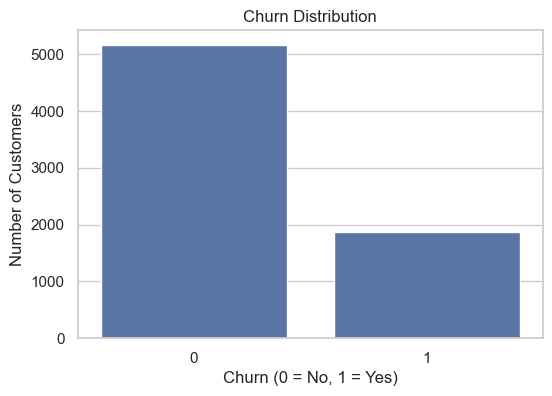

In [35]:
# Set plot style
sns.set(style="whitegrid")

# Plot the churn count
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

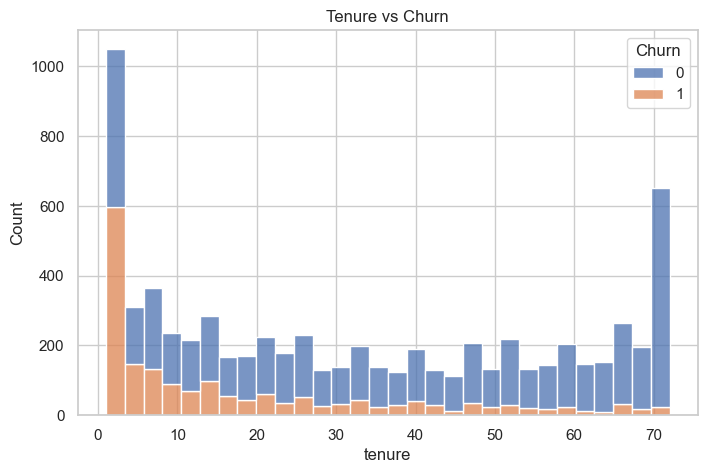

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure vs Churn')
plt.show()


### Chart Interpretation:
- X-axis: Tenure (how long customers have been with the company, from 0 to 72 months)

- Y-axis: Number of customers (count)

- Blue bars (Churn=0): Customers who did not churn (they stayed)

- Orange bars (Churn=1): Customers who churned (they left)

### Insights from the Graph:
1. High Churn at Low Tenure:
- The leftmost bars show high churn for customers with very low tenure (0–6 months).
- This means new customers are more likely to leave early.

2. Long-Term Customers Stay:
- Customers with longer tenure (50–70 months) are much more likely to stay.
- The blue bars dominate in these areas.

3. Spikes:

- There is a spike at 72 months, indicating many customers have been loyal for a long time.
- Churn in these long-term customers is very low.

### Conclusion:
-> This chart clearly shows a strong negative relationship between tenure and churn:
- The longer a customer stays, the less likely they are to leave.
- This insight can help companies target newer customers with offers or support to reduce early churn.

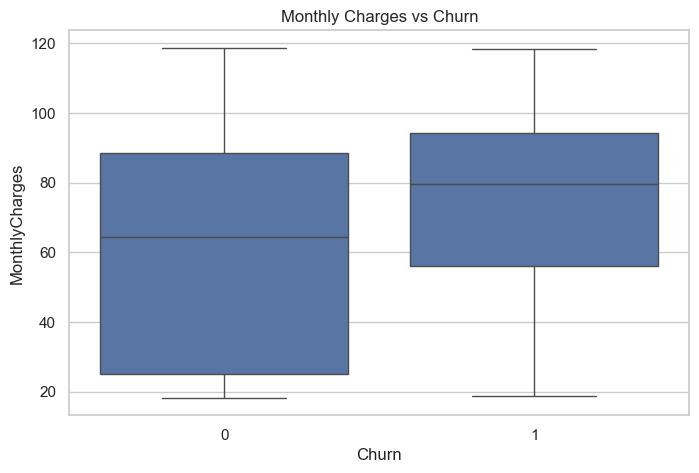

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()


### What Is This Graph?
This is a boxplot comparing MonthlyCharges between two groups:
- Churn = 0 → Customers who stayed
- Churn = 1 → Customers who left

### What the Graph Shows:
#### Left Box (Churn = 0)
- These customers did not leave the company.
- Most of them pay less money per month (MonthlyCharges is lower).
- The middle black line (median) is around ₹65.
- Some pay very little (as low as ₹20).

#### Right Box (Churn = 1)
- These customers left the company.
- Most of them pay higher bills (MonthlyCharges is higher).
- Median is around ₹80–85.
- Some still pay low, but many pay high bills (₹100+).

### Conclusion:
- Customers who pay more money per month are more likely to leave.
- Low-paying customers usually stay with the company.

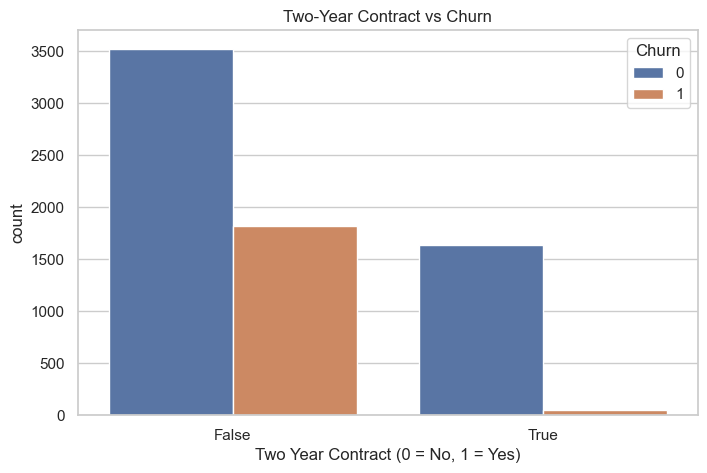

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract_Two year', hue='Churn', data=data)
plt.title('Two-Year Contract vs Churn')
plt.xlabel('Two Year Contract (0 = No, 1 = Yes)')
plt.show()


### What the Chart Shows:
#### False (No 2-Year Contract):
- Many customers stayed (blue bar)
- But many also left (orange bar)

#### True (Has 2-Year Contract):
- Most customers stayed
- Very few customers left

### Conclusion
- Customers without long contracts leave more
- Long-contract customers stay longer

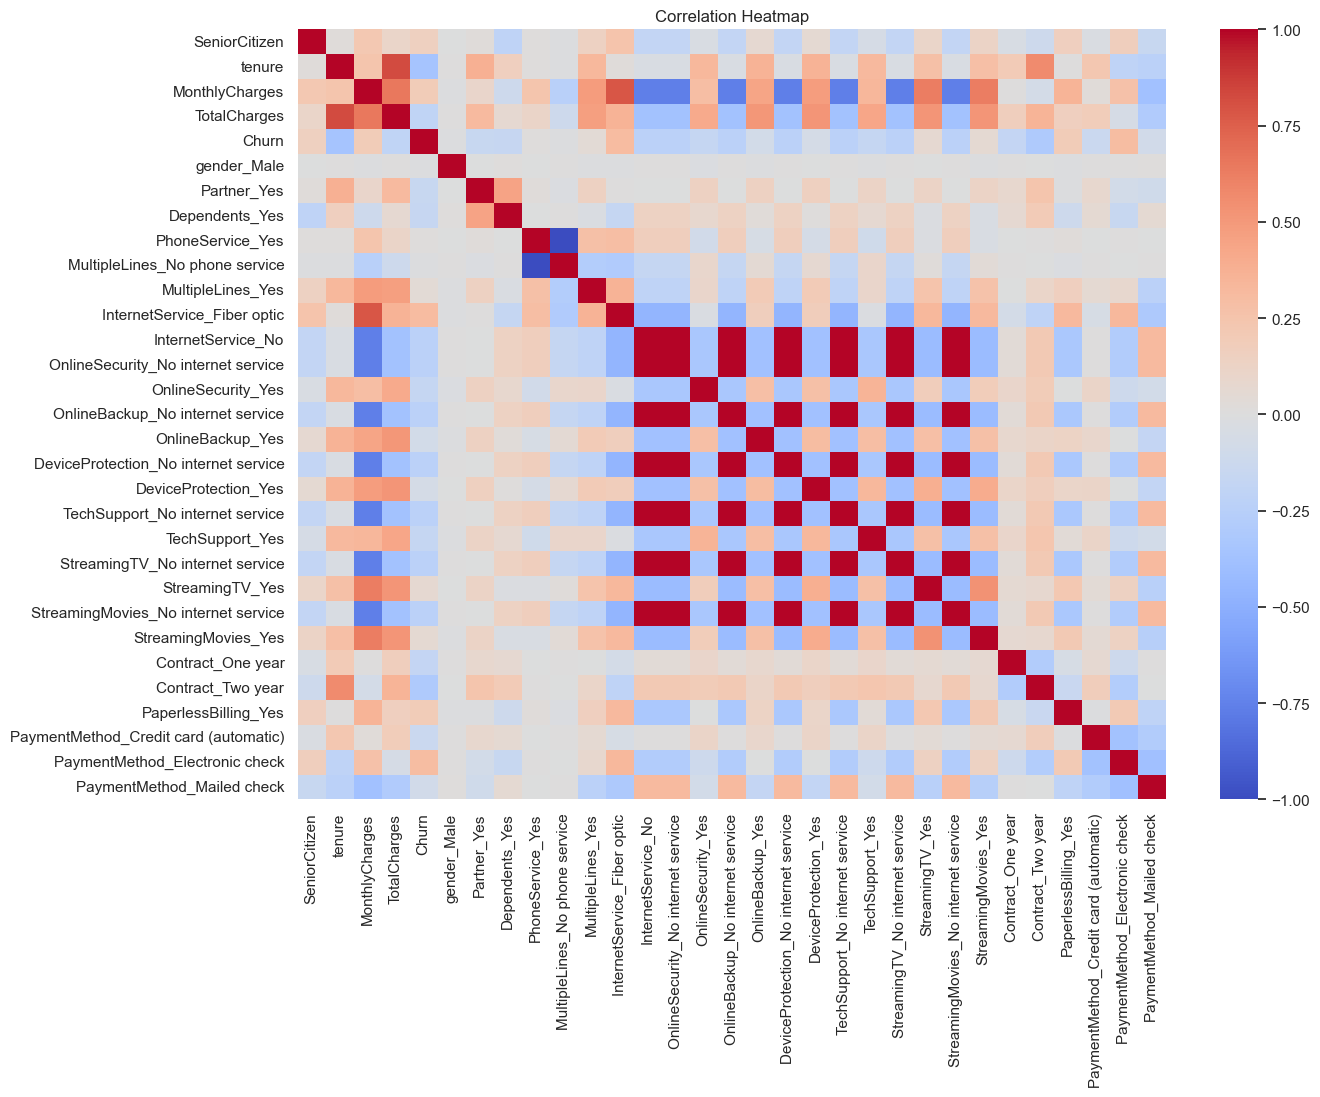

In [40]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [43]:
# Target variable
y = data['Churn']

# Features
X = data.drop('Churn', axis=1)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.7867803837953091
[[914 119]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\Swastikpc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.783226723525231
[[932 101]
 [204 170]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [46]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.7128642501776831
[[814 219]
 [185 189]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.46      0.51      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



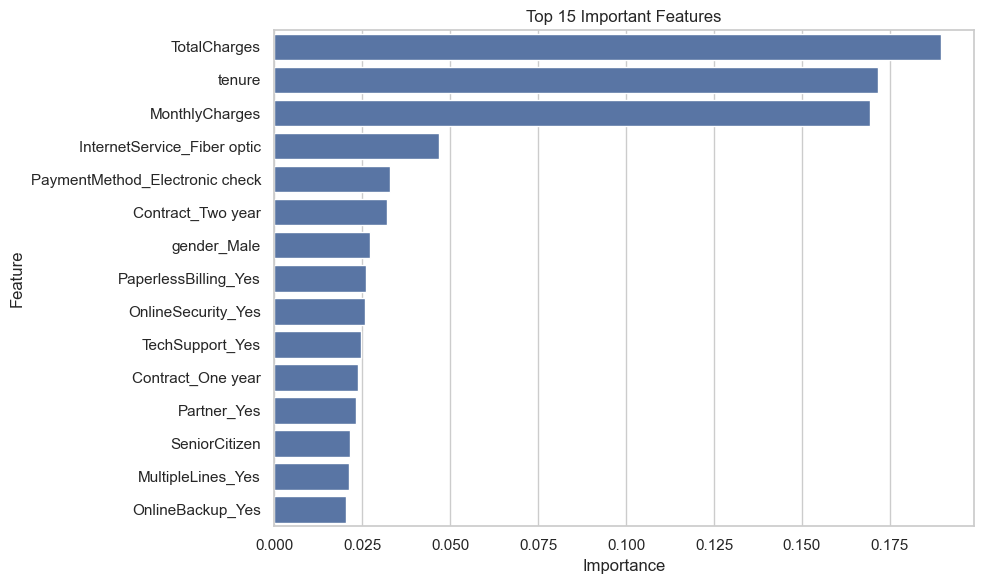

In [47]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()


In [48]:
import joblib

# Save the model
joblib.dump(rf_model, 'churn_model.pkl')

# To load it later:
# model = joblib.load('churn_model.pkl')


['churn_model.pkl']